# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 05/02/2023
* Student Name: Brian Blancato
* Student Net ID: bab3fq
* This URL: https://github.com/BrianBlancato/DS5100_Final_Project/blob/main/montecarlo_demo.ipynb
* GitHub Repo URL: https://github.com/BrianBlancato/DS5100_Final_Project

# The Monte Carlo Module

In [1]:
import pandas as pd
import random
from typing import List


class Die:
    """
    This class creates a 'die', which is any discrete random variable
    associated with a stochastic process, such as using a deck of cards 
    or flipping a coin or speaking a language.  A die has N sides, or "faces"
    and W weights and can be rolled to select a face.

    ATTRIBUTES
    __die_df    a private dataframe with columns for face and weight of the die.
    face_type   dtype of the faces in the die.

    METHODS
    __init__        Initializes a Die object with the given array of faces.
    change_weight   Changes the weight of the specified face to a new weight.
    roll            Simulates rolling the die for a given number of times.
    show            Returns the dataframe created in the initializer.
    """
    def __init__(self, faces):
        """
        DESCRIPTION
            The initializer takes an array of faces as an argument and 
            internally initializes the weights to 1.0 for each face. The faces and 
            weights are stored in a private dataframe that is shared by the 
            other methods in the Die class.
        
        INPUTS
        faces   an array of strings or numbers.

        RETURNS
        None
        """
        self.__die_df = pd.DataFrame({'face': faces, 'weight': [1.0] * len(faces)})
        self.face_type = self.__die_df['face'].dtype
    
    def change_weight(self, face, new_weight):
        """
        DESCRIPTION
            A method to change the weight of a specified face. Takes two arguments, 
            the face and the new weight. Also checks if the face and weight passed
            are valid.
        
        INPUTS
        face        a string or number that is a valid face for the Die.
        new_weight  a number that can be converted to a floating point.

        RETURNS
        None
        """
        #Checks if the given face is in the Die. Raises an error if not
        if not (self.__die_df['face'] == face).any():
            raise ValueError('Invalid Face')
        #Converts the given weight to float, raises error if it can't
        try:
            new_weight = float(new_weight)
        except ValueError:
            raise ValueError('Invalid Weight')
        self.__die_df.loc[self.__die_df['face'] == face, 'weight'] = new_weight

    def roll(self, roll_count=1):
        """
        DESCRIPTION
            A method to roll the die one or more times. Takes a parameter of how many
            times the die is to be rolled; defaults to 1. The roll is a random sample
            from the vector of faces according to the weights. Returns a list of outcomes
            that are not stored internally.
        
        INPUTS
        roll_count  int for the amount of rolls. Defaults to 1.

        RETURNS
        roll_results    a list of faces randomly selected according to weight.
        """
        #Temporary list for results
        roll_results = []
        #Randomly selects a face according to weight for amount of rolls, adds face to list that is returned
        for i in range(roll_count):
            selected_face = random.choices(self.__die_df['face'], weights=self.__die_df['weight'])[0]
            roll_results.append(selected_face)
        return roll_results
        
    def show(self):
        """
        DESCRIPTION
            A method to show the user the die's current set of faces and weights
        
        INPUT
        None

        RETURNS
        __die_df    private dataframe with columns face and weight
        """
        return self.__die_df
    
class Game:
    """
    Creates a Game object which consists of rolling one or more dice of similarly defined
    dice (Die Objects). A Game is initiated by passing a list of dice.
    A Game that is played will roll all dice and the results will be saved for 
    the most recent play.

    ATTRIBUTES
    dice        list of similarly defined Die objects
    __results   private dataframe of roll results for the most recent play

    METHODS
    __init__    Initializes a Game object from a list of Die objects passed
    play        Rolls the dice in the Game for a specified amount of times
    show        returns a wide or narrow view of the Game results
    """
    def __init__(self, dice:List[Die]):
        """
        DESCRIPTION
            Initializes the Game object. Takes a list of already initiated similar
            Die objects. Similar Die objects have the same number of sides and associated faces.
            The Die Objects may have its own weights.
        
        INPUTS
        dice    a list of initiated similar Die objects

        RETURNS
        None
        """
        self.dice = dice
        self.__results = None

    def play(self, rolls):
        """
        DESCRIPTION
            A method to roll the dice in the Game object a specified number of times.
            All dice will be rolled and the results will be saved in a private dataframe 
            of shape N rolls by M dice.
        
        INPUTS
        rolls   ints to specify how many times the dice should be rolled

        RETURNS
        None
        """
        #Creates private dataframe of shape N rolls by M dice
        self.__results = pd.DataFrame(index=range(1, rolls+1), columns=range(1, len(self.dice)+1))
        #Rolls each dice in the Game and saves result in private dataframe
        for i, die in enumerate(self.dice):
            self.__results.iloc[:, i] = die.roll(rolls)
        
    def show(self, form: str = "wide"):
        """
        DESCRIPTION
            A method to show the user the results of the most recent play.  There are two
            options, wide and narrow, which is used as the single parameter.  The wide form
            returns a dataframe with a single column index with the roll number and each die
            as a column.  The narrow form returns a dataframe with a two-column index with
            the roll number & the die number and a column for the face rolled.
            The string argument is defaulted to wide. An invalid argument will raise an exception.
        
        INPUTS
        form    a string of "wide" or "narrow"

        RETURNS
        A dataframe of results with a shape depending on the argument.
        """
        if form =="wide":
            return self.__results
        elif form == "narrow":
            return self.__results.unstack().to_frame()
        #Raises exception if form is not "wide" or "narrow"
        else:
            raise ValueError("Invalid option for 'form'. Please choose either 'wide' or 'narrow'.")      


class Analyzer:
    """
    Creates an Analyzer object from a Game object. An analyzer takes the results of a single
    game and computes various descriptive statistical properties about it.  These properties
    results are available as attributes of an Analyzer object.

    ATTRIBUTES
    __data           dataframe of Game results in wide form
    face_dtype       Data type for the faces of the Die object in the Game object.
    jackpot_count    int representing the count of jackpot rolls during the game.
    jackpot_data     dataframe of jackpot rolls, index is roll number, columns for each Dice.
    face_counts      dataframe with the number of times a face appeared each roll.
    combos           dataframe of distinct combinations of faces rolled with their counts.

    METHODS
    __init__                Initializes an Analyzer object from a Game object argument.
    jackpot                 Computes how many times the game resulted in all faces being identical.
    combo                   Computes the distinct combinations of faces rolled, along with their counts.
    face_counts_per_roll    Computes how many times a given face is rolled in each event
    """
    def __init__(self, game):
        """
        DESCRIPTION
            Initializes an Analyzer object from a single Game object analyzer.
            The Game object should be initiated.
        
        INPUTS
        game    Initiated Game object

        RETURNS
        None
        """
        self.__data = game.show('wide')
        self.face_dtype = game.dice[0].face_type
        self.jackpot_count = int
        self.jackpot_data = None
        self.combos = None
        self.face_counts = None
    
    def jackpot(self):
        """
        DESCRIPTION
            A method to compute how many times the game resulted in all faces being
            identical. Returns an integer for the number the number of times a jackpot
            occurred. Saves a public dataframe of jackpot results with the roll number
            as a named index.
        
        INPUTS
        None

        RETURNS
        jackpot_count   int, number of times a jackpot occurred in the Game
        """
        #Only saves jackpot rolls from the Game results in a new dataframe, jackpot_data
        self.jackpot_data = self.__data[self.__data.apply(lambda row: row.nunique() == 1, axis = 1)]
        #Sets jackpot_data index to the roll number of the jackpot
        self.jackpot_data.index = self.__data[self.__data.apply(lambda row: row.nunique() == 1, axis = 1)].index
        #Computes jackpot_count by checking how many rows are in jackpot_data
        self.jackpot_count = self.jackpot_data.shape[0]
        return self.jackpot_count
        
    def combo(self):
        """
        DESCRIPTION
            A method to compute the distinct combinations of faces rolled, along with
            their counts.  The combinations are stored in a sorted public dataframe that
            is multi-columned indexed and a column for their count.  This method has no
            inputs or returns.  The combo dataframe is a public attribute of the analyzer
            object that is named "combos"
        
        INPUTS
        None

        RETURNS
        None
        """
        #creates new df by grouping the rows of Game Results by list of dice and calculates their count
        self.combos = self.__data.groupby(list(self.__data.columns)).size().rename('count')
        #sets the index of combos to a multi-index based on the list of dice
        self.combos = self.combos.reset_index().set_index(list(self.__data.columns))
    
    def face_counts_per_roll(self):
        """
        DESCRIPTION
            A method to compute how many times a given face is rolled in each event.
            The results are saved in a public attribute dataframe called face_counts.
            The dataframe has an index of the roll number and face values as columns.
            The columns will have the amount of times that face appeared for the 
            corresponding roll number. The method does not have inputs or return anything

        INPUTS
        None

        RETURNS
        None
        """
        #Looks at every row of Game results, capturing the count of unique values and saving to new dataframe
        self.face_counts = self.__data.apply(lambda row: row.value_counts(), axis=1, result_type='expand').fillna(0)
        #converts the values from float to int
        self.face_counts = self.face_counts.astype(int)

# Test Module

In [2]:
import unittest
import pandas as pd
from montecarlosimulator import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    def setUp(self):
        faces = [1, 2, 3, 4, 5, 6]
        self.die = Die(faces)

    def test_change_weight(self):
        self.die.change_weight(3, 3)
        weight_for_face3 = self.die.show().loc[self.die.show()['face'] == 3, 'weight'].values[0]
        #Tests if the weight for 3 was changed to 3
        self.assertEqual(weight_for_face3, 3.0)
        #Tests for an invalid face
        with self.assertRaises(ValueError):
            self.die.change_weight('A', 4)
        #Tests for an invalid weight
        with self.assertRaises(ValueError):
            self.die.change_weight(2, 'elephant')

    def test_roll(self):
        rolled_faces = self.die.roll(10)
        valid_faces = self.die.show()['face'].values
        #Tests if roll results are face values
        for roll in rolled_faces:
            self.assertIn(roll, valid_faces)

    def test_show(self):
        #Tests if show returns a dataframe
        self.assertIsInstance(self.die.show(), pd.DataFrame)


class TestGame(unittest.TestCase):
    def setUp(self):
        faces1 = [1, 2, 3, 4, 5, 6]
        self.test_die = Die(faces1)
        self.game = Game([self.test_die, self.test_die, self.test_die])
    
    def test_play(self):
        self.game.play(25)
        results = self.game.show('wide')
        #Tests if play populated game reults private dataframe dataframe
        self.assertIsInstance(results, pd.DataFrame)
        #Tests if game results dataframe was 25 rows (rolls) and 3 columns (dice)
        self.assertEqual(results.shape, (25, 3))
        #Tests if game results has the roll number as index
        self.assertEqual(list(results.index), list(range(1,26)))
        #Tests if game results has colums for dice
        self.assertEqual(list(results.columns), [1, 2, 3])
        #Tests if game results was populated with valid faces
        for i in range(1, 26):
            for j in [1, 2, 3]:
                self.assertIn(results.loc[i,j], [1, 2, 3, 4, 5, 6])

    def test_show(self):
        self.game.play(10)
        #Tests the exception by passing an invalid argument
        with self.assertRaises(ValueError):
            self.game.show(form="invalid")
        #Tests if show returns a dataframe without an argument
        self.assertIsInstance(self.game.show(), pd.DataFrame)
        wide_results = self.game.show('wide')
        #Tests wide format has correct amount of rows
        self.assertEqual(len(wide_results.columns), 3)
        expected_wide_index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        #Tests if wide index is equal to roll numbers
        self.assertListEqual(wide_results.index.tolist(), expected_wide_index)
        narrow_results = self.game.show('narrow')
        #Tests narrow dataframe is multi-indexed
        self.assertIsInstance(narrow_results.index, pd.MultiIndex)
        #Tests narrow format has 1 column
        self.assertEqual(len(narrow_results.columns), 1)

    
class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        faces = [1, 2, 3, 4, 5, 6]
        self.die = Die(faces)
        self.game = Game([self.die, self.die])
        self.game.play(10)
        self.analyzer = Analyzer(self.game)
 
    def test_jackpot(self):
        #Tests jackpot returns an int
        self.assertIsInstance(self.analyzer.jackpot(), int)
        if self.analyzer.jackpot() != 0:
            #Tests if a jackpot_data is a dataframe
            self.assertIsInstance(self.analyzer.jackpot_data, pd.DataFrame)
            #Tests that every row of jackpot_data are the same face value
            self.assertTrue((self.analyzer.jackpot_data.nunique(axis=1) == 1).all())
            #Tests that jackpot_data index is the correct roll number
            for idx in self.analyzer.jackpot_data.index:
                self.assertTrue(self.game.show().loc[idx].equals(self.analyzer.jackpot_data.loc[idx]))

    def test_combo(self):
        self.analyzer.combo()
        #Tests that combo created a combos dataframe
        self.assertIsInstance(self.analyzer.combos, pd.DataFrame)
        #Tests that combos has a multi column index
        self.assertIsInstance(self.analyzer.combos.index, pd.MultiIndex)
        #Tests if the count of combinations is equal to the amount of rolls
        self.assertEqual(self.analyzer.combos['count'].sum(), 10)
        
    def test_face_counts_per_roll(self):
        self.analyzer.face_counts_per_roll()
        #Tests that face_count_per_roll created a face_counts dataframe
        self.assertIsInstance(self.analyzer.face_counts, pd.DataFrame)
        #Tests that face_counts has a row for each roll
        self.assertEqual(len(self.analyzer.face_counts), 10)
        #Tests that each row has values for each dice face result (2 dice rolled so each row sum should be 2)
        self.assertTrue((self.analyzer.face_counts.sum(axis=1) == 2).all())


#if __name__ == '__main__':
    #unittest.main(verbosity=3)

Welcome to the Monte Carlo Simulator


# Test Results

test_combo (__main__.TestAnalyzer) ... d:\ds5100\ds5100_final_project\montecarlosimulator\montecarlo.py:148: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  self.__results.iloc[:, i] = die.roll(rolls)
ok
test_face_counts_per_roll (__main__.TestAnalyzer) ... d:\ds5100\ds5100_final_project\montecarlosimulator\montecarlo.py:148: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  self.__results.iloc[:, i] = die.roll(rolls)
ok
test_jackpot (__main__.TestAnalyzer) ... d:\ds5100\ds5100_final_project\montecarlosimulator\montecarlo.py:148: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  self.__results.iloc[:, i] = die.roll(rolls)
ok
test_change_weight (__main__.TestDie) ... ok
test_roll (__main__.TestDie) ... ok
test_show (__main__.TestDie) ... ok
test_play (__main__.TestGame) ... d:\ds5100\ds5100_final_project\montecarlosimulator\montecarlo.py:148: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  self.__results.iloc[:, i] = die.roll(rolls)
ok
test_show (__main__.TestGame) ... d:\ds5100\ds5100_final_project\montecarlosimulator\montecarlo.py:148: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  self.__results.iloc[:, i] = die.roll(rolls)
ok

----------------------------------------------------------------------
Ran 8 tests in 0.030s

OK

# Scenarios

 

## Scenario 1

In [4]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [5]:
#Game 1
#Creating fair coin
fair_coin = montecarlosimulator.Die(["H", "T"])

#Creating a game with 5 fair coins and playing a game with 1000 rolls
sc1_game1 = montecarlosimulator.Game([fair_coin, fair_coin, fair_coin, fair_coin, fair_coin])
sc1_game1.play(1000)

#Creating an analyzer object for the game
sc1_analyzer1 = montecarlosimulator.Analyzer(sc1_game1)

#Calculating the jackpot frequency
sc1_freq_1 = sc1_analyzer1.jackpot() / 1000

print(f"Jackpot frequency of five fair coins flipped: \n\
      {sc1_freq_1}")

Jackpot frequency of five fair coins flipped: 
      0.063


In [6]:
#Game 2
#Creating an unfair coin by changing H's weight to 5.0
unfair_coin = montecarlosimulator.Die(["H", "T"])
unfair_coin.change_weight("H", 5.0)

#Creating a game with 2 unfair coins + 3 fair coins and playing a game with 1000 rolls
sc1_game2 = montecarlosimulator.Game([unfair_coin, unfair_coin, fair_coin, fair_coin, fair_coin])
sc1_game2.play(1000)

#Creating an analyzer object for the game
sc1_analyzer2 = montecarlosimulator.Analyzer(sc1_game2)

#Calculating the jackpot frequency
sc1_freq_2 = sc1_analyzer2.jackpot() / 1000

print(f"Jackpot frequency of two unfair coins & 3 fair coins flipped: \n\
      {sc1_freq_2}")

Jackpot frequency of two unfair coins & 3 fair coins flipped: 
      0.099


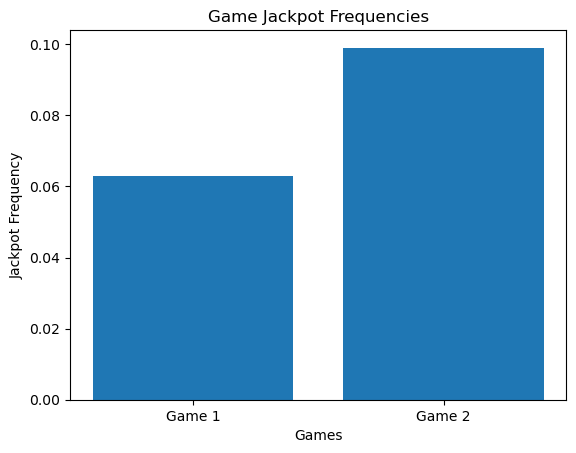

In [7]:
#Creating bar chart to compare jackpot frequencies
plt.bar(['Game 1', 'Game 2'], [sc1_freq_1, sc1_freq_2])
plt.title('Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequency')
plt.show()

## Scenario 2

In [8]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [9]:
#Game 1
#Creating fair die
fair_die = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

#Creating a game with 5 fair dice and playing a game with 10,000 rolls
sc2_game1 = montecarlosimulator.Game([fair_die, fair_die, fair_die, fair_die, fair_die])
sc2_game1.play(10000)

#Creating an analyzer object for the game
sc2_analyzer1 = montecarlosimulator.Analyzer(sc2_game1)

#Calculating the jackpot frequency
sc2_freq1 = sc2_analyzer1.jackpot() / 10000

print(f"Jackpot frequency of five fair dice rolled: \n\
      {sc2_freq1}")

Jackpot frequency of five fair dice rolled: 
      0.001


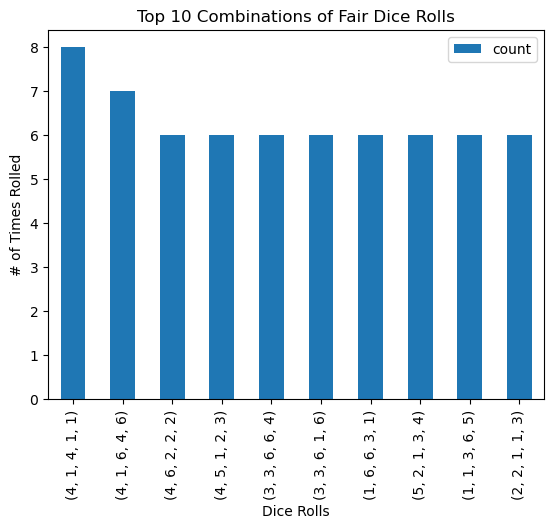

In [10]:
#Creating bar chart of 10 most frequent combinations in Game 1
#Calculating combinations and saving top 10
sc2_analyzer1.combo()
sc2_game1_top_combos = sc2_analyzer1.combos
sc2_game1_top_10 = sc2_game1_top_combos.sort_values(by='count', ascending=False,).head(10)

#Plotting bar graph
sc2_game1_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Fair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('# of Times Rolled')

plt.show()

In [11]:
#Game 2
#Creating unfair dice 
unfair_die_type1 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])
unfair_die_type2 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

unfair_die_type1.change_weight(6, 5)
unfair_die_type2.change_weight(1, 5)

#Creating a game with two tpye 1 unfair dice, one type 2 unfair die  and two fair dice. Playing 10,000 rolls
sc2_game2 = montecarlosimulator.Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
sc2_game2.play(10000)

#Creating analyzer object for the game
sc2_analyzer2 = montecarlosimulator.Analyzer(sc2_game2)

#Calculating jackpot frequency
sc2_freq2 = sc2_analyzer2.jackpot() / 10000

print(f"Jackpot frequency of 3 weighted dice and 2 fair dice rolled: \n\
      {sc2_freq2}")

Jackpot frequency of 3 weighted dice and 2 fair dice rolled: 
      0.001


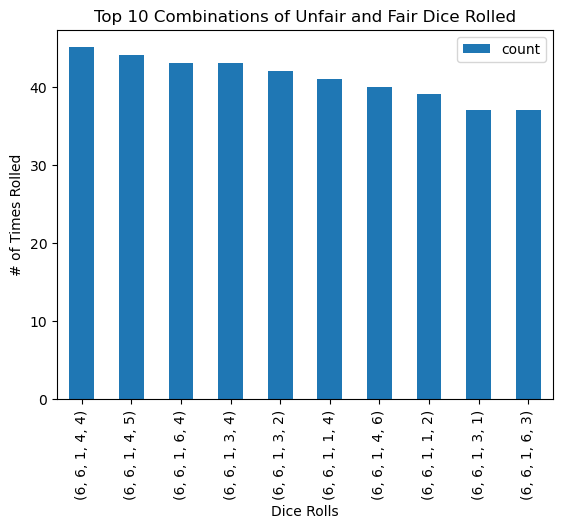

In [12]:
#Creating bar chart of 10 most frequent combinations in Game 2
#Calculating combinations and saving top 10
sc2_analyzer2.combo()
sc2_game2_top_combos = sc2_analyzer2.combos
sc2_game2_top_10 = sc2_game2_top_combos.sort_values(by='count', ascending=False,).head(10)

#Plotting Bar Graph
sc2_game2_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Unfair and Fair Dice Rolled")
plt.xlabel('Dice Rolls')
plt.ylabel('# of Times Rolled')

plt.show()

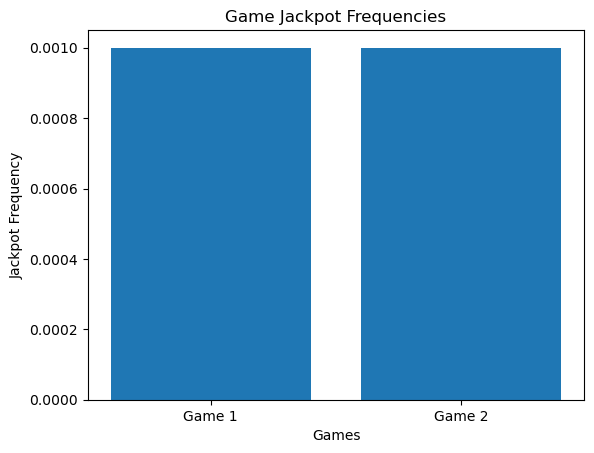

In [13]:
#Creating bar chart to compare the games' jackpot frequencies
plt.bar(['Game 1', 'Game 2'], [sc2_freq1, sc2_freq2])
plt.title('Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequency')
plt.show()

## Scenario 3

In [14]:
import pandas as pd
import montecarlosimulator

In [15]:
#Creating letter and letter weight lists
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
frequencies = [8.4966, 2.072, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034,
               7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671,
               0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902,
               1.7779, 0.2722]

#Create a dataframe to use for letter and weights
letter_freq_df = pd.DataFrame({'letter': letters, 'frequency': frequencies})

In [16]:
#Creating an array of letters and using it to create a Die object
letter_array = letter_freq_df['letter'].values
letter_die = montecarlosimulator.Die(letter_array)

#Changing the weight of each letter to the appropriate weight
for face in letter_array:
    frequency = letter_freq_df.loc[letter_freq_df['letter'] == face, 'frequency'].values[0]
    letter_die.change_weight(face, frequency)

#Creating a game with 5 'letter die' and playing a game with 1000 rolls
sc3_game = montecarlosimulator.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
sc3_game.play(1000)

#Creating analyzer object for the game
sc3_analyzer = montecarlosimulator.Analyzer(sc3_game)

#Calculating the unique combinations and saving the analyzer attribute as it's own dataframe
sc3_analyzer.combo()
sc3_combos = sc3_analyzer.combos

#Displaying full dataframe to count english words
pd.set_option('display.max_rows', None)
sc3_combos

count
1 2 3 4 5       
A A B R L      1
    E L D      1
      M S      1
    L A R      1
    M L T      1
    O C F      1
  B A T C      1
  C H I E      1
    I A U      1
      C E      1
      Y L      1
    K T I      1
    L S C      1
    O R R      1
    T M R      1
    W A N      1
  D A Y E      1
    D R T      1
    E I T      1
  E B U E      1
    D S T      1
    E R U      1
    H L S      1
    I L E      1
    M A N      1
    N O S      1
    O S O      1
    P I T      1
      T B      1
    S T M      1
  F I A O      1
  G D O R      1
    L P O      1
  H A V A      1
    D C H      1
    L T E      1
    M R A      1
  I A U F      1
    E P O      1
    G P R      1
    I O W      1
    N A D      1
    S T B      1
    T A T      1
    U R N      1
  L R I I      1
      R O      1
    S P L      1
  M R R E      1
  N G E N      1
      L P      1
    L M N      1
    P L R      1
      O I      1
    V U O      1
    Y L O      1
  O A A T      1
      E C      1
    C R A      1
    I R U      1
    N L C      1
    O D G      1
      F M      1
      H E      1
    S M P      1
    T A B      1
      U E      1
  P A E S      1
    L E N      1
  R A O N      1
    E A T      1
    H I I      1
    L A R      1
      T P      1
    O A A      1
    R N T      1
    T I E      1
  S A B T      1
    E A L      1
    H M Y      1
    P K S      1
      T Y      1
    R O I      1
    S L E      1
    U S I      1
  T E E O      1
      V D      1
    N I I      1
      N I      1
  U A A C      1
    C N A      1
    E E R      1
    F C O      1
  X C P E      1
  Z C W T      1
B A C N R      1
    S E B      1
    U H I      1
  C E C E      1
  E A W L      1
    E E I      1
    S G U      1
  I A E O      1
    H S L      1
  L E E G      1
    L L P      1
  N B M O      1
  O I R F      1
    M D N      1
    R F S      1
    S O I      1
    T A S      1
  P I P L      1
    N N A      1
  R I O A      1
    T E A      1
  S L T O      1
    N A K      1
C A G C E      1
    O I E      1
  C A L M      1
    M R E      1
    T I B      1
  E M E H      1
    Q O I      1
    R N E      1
  F N B E      1
    R I E      1
  G C E O      1
  H I E S      1
  I D O E      1
    I I R      1
    M T L      1
    N L L      1
  L E N N      1
    L T R      1
    V O T      1
  M R R D      1
  N C E L      1
    E U R      1
    T R E      1
    U O C      1
  O G N S      1
    P T S      1
  P R D C      1
    T T S      1
    Y N L      1
  R N V S      1
    Y I T      1
  S L G R      1
  T C V T      1
    E L S      1
    I I S      1
    M A E      1
  U R A L      1
    S R O      1
    V U P      1
  Z S N C      1
D A U P P      1
  C D U A      1
  E A W T      1
    N H N      1
  G E W N      1
    I V H      1
  I D A I      1
    K U H      1
  N O S E      1
    T O S      1
  O G I F      1
  P O H I      1
  R D P T      1
    L I T      1
    S H S      1
    T A W      1
  S A O K      1
      U C      1
    T W F      1
  T E T K      1
  U A O P      1
  V P R N      1
    R C L      1
E A A D G      1
    E O S      1
      R U      1
      T A      1
    F I T      1
    L E E      1
    M E D      1
    N I E      1
    R O O      1
    S S E      1
    T E A      1
    V G L      1
      U A      1
  B O M S      1
    S R E      1
    W N P      1
  C A R C      1
    F T D      1
      Y Y      1
    I E O      1
    O E M      1
      T E      1
    R C V      1
  D L R S      1
    O T E      1
    Z F E      1
  E A I E      1
    D T Y      1
    E T I      1
    H E O      1
    L F A      1
    N A E      1
    R O A      1
      S D      1
      U R      1
    S E O      1
      I I      1
    T E S      1
      G I      1
  F H A D      1
  G E A E      1
      M R      1
      P B      1
    R R U      1
  H A V L      1
    P N E      1
    T L C      1
  I D L D      1
    E M A      1
      P A      1
    F I B      1
    N O R      1
    O N O      1

In [17]:
#I counted 8 english words present in the combinations

english_words = 8

eng_word_freq = english_words / 1000

print(f"English word frequency: \n\
      {eng_word_freq}")

English word frequency: 
      0.008


# Directory Listing



In [18]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 1616-9B9B

 Directory of D:\DS5100\DS5100_Final_Project

05/02/2023  12:21 AM    <DIR>          .
05/02/2023  12:21 AM    <DIR>          ..
04/27/2023  08:20 PM             3,238 .gitignore
05/01/2023  11:51 PM    <DIR>          .ipynb_checkpoints
04/27/2023  08:20 PM             1,091 LICENSE
05/02/2023  12:16 AM    <DIR>          montecarlosimulator
05/02/2023  12:08 AM    <DIR>          montecarlosimulator.egg-info
05/02/2023  12:21 AM           352,521 montecarlo_demo.ipynb
04/27/2023  08:20 PM                22 README.md
04/28/2023  11:30 PM               334 setup.py
               5 File(s)        357,206 bytes
               5 Dir(s)  1,386,125,352,960 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [19]:
#Install package from local files
!pip install -e D:\DS5100\DS5100_Final_Project

Obtaining file:///D:/DS5100/DS5100_Final_Project
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: montecarlosimulator
    Found existing installation: montecarlosimulator 1.0.0
    Uninstalling montecarlosimulator-1.0.0:
      Successfully uninstalled montecarlosimulator-1.0.0
  Running setup.py develop for montecarlosimulator


In [20]:
#Install package from Github
!pip install "git+https://github.com/BrianBlancato/DS5100_Final_Project.git"

  Cloning https://github.com/BrianBlancato/DS5100_Final_Project.git to c:\users\brian\appdata\local\temp\pip-req-build-1ab4iqge
  Resolved https://github.com/BrianBlancato/DS5100_Final_Project.git to commit bf4f790026514b464a34cb3d0b7b742cd8054863
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for montecarlosimulator: filename=montecarlosimulator-1.0.0-py3-none-any.whl size=7219 sha256=ea40a3e3475ffd304d6d74c56ce8186daa86f39eb7d7afa3f129306dac7a881b
  Stored in directory: C:\Users\brian\AppData\Local\Temp\pip-ephem-wheel-cache-gw52el2p\wheels\9f\60\bc\543bf247a5f2df79d1b0603a953a3fcfed40886da3dee6ffb4
Successfully built montecarlosimulator
  Attempting uninstall: montecarlosimulator
    Found existing installation: montecarlosimulator 1.0.0
    Uninstalling montecarlosimulator-1.0.0:
      Successfully uninstalled montecarlosimulator-1.0.0


  Running command git clone --filter=blob:none --quiet https://github.com/BrianBlancato/DS5100_Final_Project.git 'C:\Users\brian\AppData\Local\Temp\pip-req-build-1ab4iqge'
